In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed, FloatSlider, IntSlider, Dropdown, HBox, VBox, Checkbox
# import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,array,arange,linspace,meshgrid

from ipykernel.pylab.backend_inline import flush_figures

from scipy.integrate import quad, dblquad, tplquad

%matplotlib widget

plt.rcParams.update({
    "figure.figsize": (7, 7),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

In [2]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

ol li {
    padding: .5em;
}

th, td {
    font-size: large;
}
</style>

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$

<style>
    td {
      font-size: 1.5em;
    }
</style>

# Let's Review

## Four Big Theorems

  - ### FTLI
$$ f(C_{1}) - f(C_0) = \int_{C} \nabla f\cdot d\vec r $$

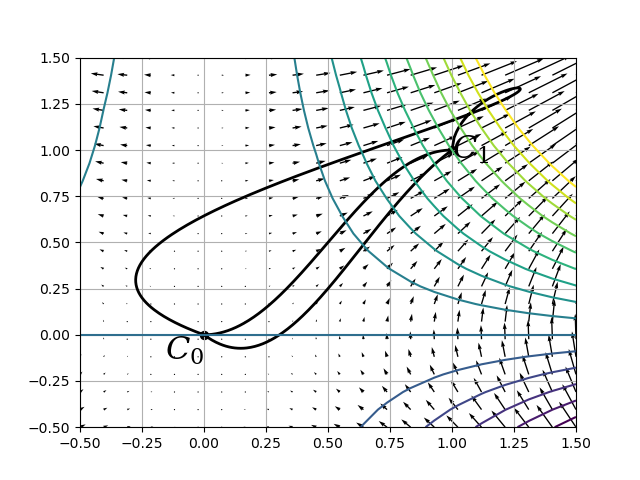

In [3]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    ts = linspace(0, 1, 250)
    xs = ys = linspace(-1/2, 3/2, 22)
    
    X, Y = meshgrid(xs, ys)
    
    ax.plot(ts - sin(2 * pi * ts) / 2, sin(ts*pi/2)**2 + 1*ts**3*(1-ts)**(1/2) + sin(pi*ts) / 3, 'k', lw=2)
    ax.plot(ts, sin(ts*pi/2)**2 - 1*ts*(1-ts), 'k', lw=2)
    ax.plot(ts, sin(ts*pi/2)**2, 'k', lw=2)
    
    ax.quiver(X, Y, X*Y, 1/2*X**2)
    
    c = ax.contour(X, Y, X**2*Y / 2, levels=arange(-.5, 1, .1))
    
    ax.set_xlim(-1/2, 3/2)
    ax.set_ylim(-1/2, 3/2)
    
    ax.scatter([0, 1], [0, 1], s=33, c='k')
    
    ax.text(0,0,r"$C_0$", fontsize=23, va='top',ha='right', math_fontfamily='dejavuserif')
    ax.text(1, 1, r"$C_1$", fontsize=23, va='center',ha='left', math_fontfamily='dejavuserif')
    
    ax.grid()
    
    return fig.canvas

a("FTLI")

  - ### Green's Theorem
$$ \oint_{\partial D} P\, dx + Q\,dy = \iint_D (Q_x - P_y)\,dA $$

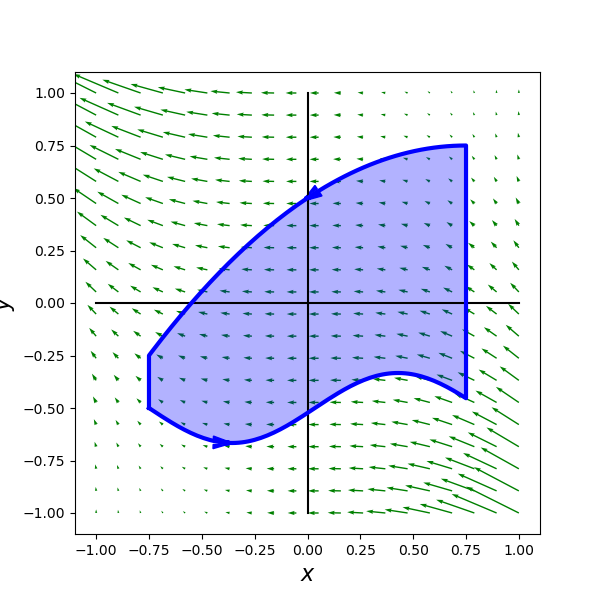

In [4]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE, figsize=(6, 6))
    plt.ion()
    
    x = y = np.linspace(-1,1,20)
    x,y = np.meshgrid(x,y)
    
    ax.quiver(x,y,x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2,color='g');
    for c in 'xy':
    #         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    t= np.linspace(0,1,100)    
    # ax.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
    ax.plot([0,0],[-1,1],'k')
    ax.plot([-1,1],[0,0],'k')
    xs = np.concatenate((t*3/2 - 3/4,(1-t)*3/2 - 3/4,[-.75]))
    ys = np.concatenate((0*t - sin(6*t)*1/6 - 1/2,0*t + 3/4 - t**2,[-1/2]))
    for ti in (25,150):
        ax.arrow(xs[ti],ys[ti],(xs[ti+1]-xs[ti-1])/2,(ys[ti+1]-ys[ti-1])/2,width=.02,color='b',length_includes_head=True)
    ax.fill(xs,ys,'b',lw=3,alpha=.3);
    ax.plot(xs,ys,'b',lw=3,alpha=1);

    # plt.plot((1-t)*cos(t*4*pi/2-pi),(1-t)*sin(t*4*pi/2-pi),'b',lw=3);
    # plt.plot((1-t)*cos(t*6*pi/2-pi),(1-t)*sin(t*6*pi/2-pi),'b',lw=3);
    
    return fig.canvas

a("Green's")

  - ### Stokes' Theorem
  $$ \oint_{\partial \Omega} \vec F\cdot d\vec r = \iint_\Omega \nabla\times F \cdot d\vec S$$ 

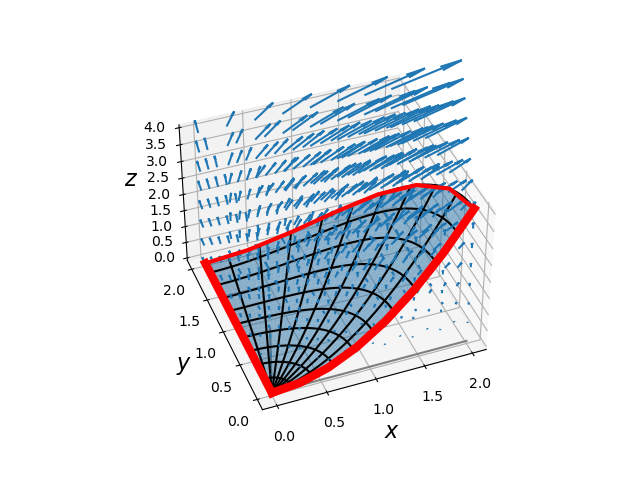

In [5]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    # make axes lines
    ax.plot([0,2],[0,0],[0,0],'gray')
    ax.plot([0,0],[0,2],[0,0],'gray')
    ax.plot([0,0],[0,0],[0,2],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([0,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)
    
    u = np.linspace(0,2,40)
    v = np.linspace(0,pi/2,40)
    U,V = np.meshgrid(u,v)
    ax.view_init(40, -111)
    ax.plot_surface(U*cos(V),U*sin(V),U**2*cos(V)**2,alpha=.5)
    ax.plot_wireframe(U*cos(V),U*sin(V),U**2*cos(V)**2,alpha=1,color='k',rcount=10,ccount=10)
    # ax.plot_surface(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=.5)
    # ax.plot_wireframe(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=1,color='k',rcount=10,ccount=10)
    u = v = np.linspace(0,2,8)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,2*u)
    ax.quiver(U,V,W,U*W*V,V,W,length=.05);
    ax.plot(u, 0*u, u**2, lw=6, color='r', zorder=6)
    ax.plot(0*u,u, 0*u, lw=6, color='r', zorder=6)
    ax.plot(2*cos(u* pi/4), 2*sin(u* pi/4), 4*cos(u* pi/4)**2, lw=3, color='r', zorder=6)
    
    return fig.canvas
    

a("Stokes")

  - ### Divergence Theorem
  $$ \iint_{\partial E} \vec F \cdot d\vec S = \iiint_E \nabla\cdot \vec F \,dV $$
  

In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    u = np.linspace(0,pi,150)
    v = np.linspace(0,2*pi,100)
    U,V = np.meshgrid(u,v)
    rd = 1+1/3*sin(U*2)**2*sin(V*3)**2
    srf = rd*sin(U)*cos(V),rd*sin(U)*sin(V),rd*cos(U)
    
    zoom = 1
    poly_stuff = []
    q_stuff = []
    
    
    p = ax.plot_surface(*srf,alpha=.5*zoom,color='g')
    q_stuff.append(ax.plot_wireframe(*srf, alpha=zoom, color='k', rcount=10, ccount=10))
    u = v = np.linspace(-1,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    q_stuff.append(ax.quiver(U,(V),W,U,V,W, length=.2, alpha=zoom))
    U,V = meshgrid([0,1],[0,1])
    srf = .05*U,0,.05*V
    
    poly_stuff.append(ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b'))
    poly_stuff.append(ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10))
    srf = .05,.05*U,.05*V
    poly_stuff.append(ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b'))
    poly_stuff.append(ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10))
    srf = .05*U,.05*V,.05 + U*0
    poly_stuff.append(ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b'))
    poly_stuff.append(ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10))
    srf = .05*U,.05,.05*V
    poly_stuff.append(ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b'))
    poly_stuff.append(ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10))

    U,V,W = np.meshgrid([0.,1.,2.],[0.,1.,2.],[0.,1.,2.])

    q = ax.quiver(.025*U,(.025*V),.025*W,.025*U,.025*V,.025*W,length=.2,alpha=(1 - zoom));

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-zoom,.1+.9*zoom])

    
    slider = FloatSlider(min=0, max=1, step=.02, value=1)
    
    def update(change):
        zoom = slider.value
        
        for c in 'xyz':
            getattr(ax,f"set_{c}lim")([-zoom,.1+.9*zoom])
            
        p.set_alpha(.5*zoom)
        q.set_alpha(1 - zoom)
        for x in poly_stuff:
            x.set_alpha(.7*(1-zoom))
        for x in q_stuff:
            x.set_alpha(zoom)
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Divergence Theorem")

#### 
<p style="padding-bottom:40%;"> </p>

### Example

Construct a flux integral for which **both** Stokes' and the Divergence Theorem apply. What do they say?

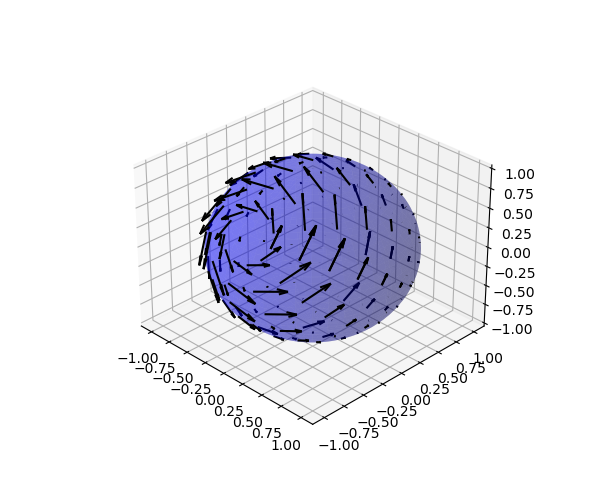

In [8]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(6, 5))
    plt.ion()
    ax = fig.add_subplot(projection='3d') 

    slider = FloatSlider(min=0, max=1, step=.01)
    t = slider.value
    
    ps = []
    
    u = np.linspace(0,pi,255)
    v = np.linspace(0,2*pi,255)
    U,V = np.meshgrid(u,v)
    
    X = sin(U)*cos(V)
    Y = sin(U)*sin(V)
    Z = cos(U)
    
    ax.plot_surface(X, Y, Z, alpha=.3, color='b')
    # ax.plot_wireframe(X, Y, Z, lw=1, rcount=10, ccount=10, color='gray')
        
    u = np.linspace(0,pi,12)
    v = np.linspace(0,2*pi,12)
    U,V = np.meshgrid(u,v)
    
    X = sin(U)*cos(V)
    Y = sin(U)*sin(V)
    Z = cos(U)
    
    ax.quiver(X, cos(1)*Y - sin(1)*Z, sin(1)*Y + cos(1)*Z, -Y*exp(-U**2), cos(1)*X*exp(-U**2), sin(1)*X*exp(-U**2), color='k', zorder=6)

    u = np.linspace(4*pi/11,pi,8)
    v = np.linspace(pi/11, pi/11 + 2*pi,12)
    U,V = np.meshgrid(u,v)
    
    X = sin(U)*cos(V)
    Y = sin(U)*sin(V)
    Z = cos(U)
    
    ax.quiver(X, cos(1)*Y - sin(1)*Z, sin(1)*Y + cos(1)*Z, -Y*exp(-U**2), cos(1)*X*exp(-U**2), sin(1)*X*exp(-U**2), color='k', zorder=6)
    
    # ax.quiver(X, cos(-1)*Y - sin(-1)*Z, sin(-1)*Y + cos(-1)*Z, -Y*exp(-5*U**2), cos(-1)*X*exp(-5*U**2), sin(-1)*X*exp(-5*U**2), color='k', zorder=6)
    ax.set_autoscale_on(True)

        
    v = array((1, 1, 1/2))
    v = v / norm(v)
    u = array((1, -1, 0))
    u = u / norm(u)    
    w = np.cross(v, u)
    
    # print(X)
    
    ax.view_init(30, -45)
    
    # slider.observe(update, names='value')
    # return VBox([slider, fig.canvas])
    return fig.canvas

a("The Eye")

#### 
<p style="padding-bottom:40%;"> </p>

### Example - Buoyancy

Recall that hydrostatic pressure is proportional to depth. $P = \rho g d$. The force on a small piece of submerged surface is $P\, \vec N\,dS$ where $\vec N$ is the normal vector to the surface. The (net) buoyant force on the hull of a watercraft is the component of this force in the upward direction. 

Use the Divergence Theorem to relate the buoyant force to the volume of a submerged object. 

In [12]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    xyz0 = (0.5833333333333334, 0.5833333333333333, 0.8249579113843055)
    
    zoom = 1
    
    
    # blob
    u = np.linspace(0,pi,300)
    v = np.linspace(0,2*pi,300)
    U,V = np.meshgrid(u,v)
    rd = 1+1/3*sin(U*2)**2*sin(V*3)**2
    srf = rd*sin(U)*cos(V),rd*sin(U)*sin(V),rd*cos(U)
    p1 = ax.plot_surface(*srf,alpha=.4*zoom + .1,color='g')
    ax.plot_wireframe(*srf,alpha=1,color='k',rcount=10,ccount=10)
    
    # normal vectors
    u = np.linspace(0,pi,9)
    v = np.linspace(0,2*pi,17)
    U,V = np.meshgrid(u,v)
    rd = 1+1/3*sin(U*2)**2*sin(V*3)**2
    srf = rd*sin(U)*cos(V),rd*sin(U)*sin(V),rd*cos(U)
    ax.quiver(*srf, 
              -(((sin(2*U)**2*sin(3*V)**2 + 3)*cos(V) + 6*sin(2*U)**2*sin(V)*sin(3*V)*cos(3*V))*(-20*sin(U)**4*sin(3*V)**2 + 28*sin(U)**2*sin(3*V)**2 - 8*sin(3*V)**2 + 3) + 24*(-20*sin(U)**4*sin(3*V)**2 + 12*sin(U)**2*sin(3*V)**2 + 3)*sin(V)*sin(3*V)*cos(U)**4*cos(3*V))*sin(U)**2/9,
              -(((sin(2*U)**2*sin(3*V)**2 + 3)*sin(V) - 6*sin(2*U)**2*sin(3*V)*cos(V)*cos(3*V))*(-20*sin(U)**4*sin(3*V)**2 + 28*sin(U)**2*sin(3*V)**2 - 8*sin(3*V)**2 + 3) - 24*(-20*sin(U)**4*sin(3*V)**2 + 12*sin(U)**2*sin(3*V)**2 + 3)*sin(3*V)*cos(U)**4*cos(V)*cos(3*V))*sin(U)**2/9,
              -(-20*sin(U)**4*sin(3*V)**2 + 12*sin(U)**2*sin(3*V)**2 + 3)*(-4*sin(U)**4*sin(3*V)**2 + 4*sin(U)**2*sin(3*V)**2 + 3)*sin(U)*cos(U)/9,
              length=.2,alpha=1);
    
    # small patch
    u = v = np.linspace(pi/4-.1,pi/4+.1,30)
    U,V = np.meshgrid(u,v)
    rd = 1+1/3*sin(U*2)**2*sin(V*3)**2
    srf = rd*sin(U)*cos(V),rd*sin(U)*sin(V),rd*cos(U)
    p2 = ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    p3 = ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=4,ccount=4)

    U,V,W = np.meshgrid([0.,1.,2.],[0.,1.,2.],[0.,1.,2.])

    q1 = ax.quiver(*xyz0,0,0,1,length=.2,alpha=(1 - zoom), color="r");

    # xyz0 = (0.5833333333333334, 0.5833333333333333, 0.8249579113843055)
    ax.set_xlim([-1*zoom + (xyz0[0]-.1)*(1 - zoom),1*zoom + (xyz0[0]+.1)*(1 - zoom)])
    ax.set_ylim([-1*zoom + (xyz0[1]-.1)*(1 - zoom),1*zoom + (xyz0[1]+.1)*(1 - zoom)])
    ax.set_zlim([-1*zoom + (xyz0[2]-.1)*(1 - zoom),1*zoom + (xyz0[2]+.1)*(1 - zoom)])

    
    slider = FloatSlider(min=0, max=1, step=.02, value=1)
    
    def update(change):
        zoom = slider.value
        
        # xyz0 = (0.5833333333333334, 0.5833333333333333, 0.8249579113843055)
        ax.set_xlim([-1*zoom + (xyz0[0]-.1)*(1 - zoom),1*zoom + (xyz0[0]+.1)*(1 - zoom)])
        ax.set_ylim([-1*zoom + (xyz0[1]-.1)*(1 - zoom),1*zoom + (xyz0[1]+.1)*(1 - zoom)])
        ax.set_zlim([-1*zoom + (xyz0[2]-.1)*(1 - zoom),1*zoom + (xyz0[2]+.1)*(1 - zoom)])
        
        p1.set_alpha(.4*zoom + .1)
        p2.set_alpha(.7*(1 - zoom))
        p3.set_alpha(.7*(1 - zoom))
        q1.set_alpha(1 - zoom)
        
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Buoyancy")

#### Solution

Suppose an object is modeled by a solid $E$ with outward-oriented normal $\vec N$ on the boundary $\partial E = \Sigma$, where the surface of the water is $z = 0$. 

Then the total buoyant force is $$\iint_\Sigma \rho g (-z)(-\vec N)\cdot \vec k\, dS = \rho g \iint_{\partial E} z\,\vec k \cdot d\vec S$$

but the vector field $z\,\vec k$ has divergence 1, so the RHS is just $\rho g \operatorname{Vol}(E)$, the weight of the water displaced by $E$.

#### 
<p style="padding-bottom:40%;"> </p>

### Example - Gauss's Law

Coulomb's Law states that the strength of the electric field $\vec E$ from a charge $q$ at the origin is given by 
$$\vec E(x,y,z) = \frac{q}{4\pi\varepsilon_0} \frac{\langle x, y, z \rangle}{\sqrt{x^2 + y^2 + z^2}^3}$$ i.e., has strength inversely proportional to the distance squared.

Let's compute $\nabla\cdot \vec E$.

#### Solution

Let's start with 

$$P_x = \frac{\partial}{\partial x} \frac{x}{(x^2 + y^2 +z^2)^{3/2}}$$

$$ = \frac{(x^2 + y^2 +z^2)^{3/2} - 3 x^2 (x^2 + y^2 +z^2)^{1/2}}{(x^2 + y^2 +z^2)^{3}}$$

$$ = \frac{1}{(x^2 + y^2 +z^2)^{3/2}} - \frac{3 x^2 } {(x^2 + y^2 +z^2)^{5/2}} $$

Repeating this for $Q_y$ and $R_z$ gives

$$P_x + Q_y + R_z = \frac{3}{(x^2 + y^2 +z^2)^{3/2}} - \frac{3 x^2 + 3y^2 + 3z^2} {(x^2 + y^2 +z^2)^{5/2}} = \frac{3}{(x^2 + y^2 +z^2)^{3/2}} - \frac{3 } {(x^2 + y^2 +z^2)^{3/2}} = 0$$

####
The Divergence Theorem is also known as Gauss's Theorem. A clever consequence of it in electrostatics is Gauss's Law.

$$\iint\limits_{\Sigma} \vec E\cdot d\vec S = \frac{Q}{\varepsilon_0}  $$ where $\vec E$ is the electric field, $\varepsilon$ is the permittivity, $\Sigma$ is a closed surface, and $Q$ is the total charge contained therein.

In other words, the flux through a surface is independent of shape, but only depends on the amount of surrounded charge. 

In [11]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(6, 5))
    plt.ion()
    ax = fig.add_subplot(projection='3d') 

    slider = FloatSlider(min=0, max=1, step=.01)
    t = slider.value
    
    ps = []

    u = np.linspace(0,4,6)
    v = np.linspace(-2,2,6)
    U,V,W = np.meshgrid(u,v,v)
    
    ax.quiver(U, V, W, 
              (U - 1)/sqrt((U - 1)**2 + V**2 + W**2)**3, 
              V/sqrt((U - 1)**2 + V**2 + W**2)**3,  
              W/sqrt((U - 1)**2 + V**2 + W**2)**3,
              zorder=-1) 
    
    u = np.linspace(0,1,55)
    v = np.linspace(0,1,55)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    ps.append(ax.plot_surface(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,color=(.3,.8,.5,.4)))
    ps.append(ax.plot_wireframe(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,alpha=1,color='k',rcount=6,ccount=6))
    ax.plot_surface(p,q,-r,color=(.3,1,.5,.4))
    ax.plot_wireframe(p,q,-r,alpha=1,color='k',rcount=6,ccount=6)
    rd = sqrt(U - U**2)
    p,q,r = U + 1/2, rd*cos(V*pi),rd*sin(V*pi)
    ps.append(ax.plot_surface(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,color=(.3,1,.5,.4)))
    ps.append(ax.plot_wireframe(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,alpha=1,color='k',rcount=4,ccount=4))
    ax.plot_surface(p,q,-r,color=(.3,1,.5,.4))
    ax.plot_wireframe(p,q,-r,alpha=1,color='k',rcount=4,ccount=4)

    for c in 'x':
        getattr(ax,f"set_{c}lim")((0,4))
    ax.set_ylim((-2,2))
    ax.set_zlim((-2,2))
    
    def update(change):
        t = slider.value
        while ps:
            ax.collections.remove(ps.pop())

        rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
        p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
        
        ps.append(ax.plot_surface(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,color=(.3,.8,.5,.4)))
        ps.append(ax.plot_wireframe(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,alpha=1,color='k',rcount=6,ccount=6))

        rd = sqrt(U - U**2)
        p,q,r = U + 1/2, rd*cos(V*pi),rd*sin(V*pi)
        
        ps.append(ax.plot_surface(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,color=(.3,1,.5,.4)))
        ps.append(ax.plot_wireframe(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,alpha=1,color='k',rcount=4,ccount=4))
    
    ax.set_autoscale_on(True)
    ax.view_init(45,45)
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("The Electric Avocado")

## Vector Calculus

### Things you should be able to do:

  - Parametrize curves $\vec r: [a, b] \to \RR$
    - line segment
    - circle
    - helix
    - graph $y = f(x)$
  - Parametrize surfaces
    - graph $z = f(x,y)$
    - surface of revolution
    - sphere
  - Compute path integrals
    - w/r/t arc length $\int_C f\,ds$
    - of a scalar field $\int_C g\,dx$
    - of a vector field $\int_C \vec F\cdot d\vec r = \int_C P\,dx + Q\,dy$
  - Compute surface integrals
    - w/r/t surface area $\iint_\Omega f\,dS$
    - flux of a vector field $\iint_\Omega \vec F\cdot d\vec S = \iint_\Omega \vec F\cdot \vec N\, dS$
  - Determine if a field is conservative
    - if so, find potential 
  - Compute the curl of a vector field. 
  - Apply the Big 4 Theorems above